<a href="https://colab.research.google.com/github/FernandoIGD12/UTEC_programming101/blob/main/Intro_AI/6_genetic_algortihms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Genetic Algorithms

# TSP problem

Plotting

In [1]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
from matplotlib import pyplot as plt


def plot_tsp(nodes, route):
    """
    Plot the TSP nodes and route.

    Parameters:
    - nodes: List of tuples containing the coordinates of each node.
    - route: List of node indices representing the TSP route.
    """
    x = [node[0] for node in nodes]
    y = [node[1] for node in nodes]

    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, color='blue', zorder=2)  # Plot nodes


    for i in range(len(route) - 1):
        node1 = route[i]
        node2 = route[i + 1]
        plt.plot([nodes[node1][0], nodes[node2][0]], [nodes[node1][1], nodes[node2][1]], color='red', zorder=1)  # Plot route

    # Connect the last node to the first node to form a loop
    node1 = route[-1]
    node2 = route[0]
    plt.plot([nodes[node1][0], nodes[node2][0]], [nodes[node1][1], nodes[node2][1]], color='red', zorder=1)  # Plot route

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('TSP Nodes and Route')
    plt.grid(True)
    plt.show()

Cities and distancess

In [3]:
N = 10 # num cities
pop_size = 8 # population size
cities = np.random.rand(N, 2)
distances = squareform(pdist(cities, 'euclidean'))
#print(positions)
#print(distances)

#Population initialization

[[8, 3, 6, 1, 2, 7, 5, 0, 9, 4], [0, 5, 9, 3, 2, 4, 1, 6, 7, 8], [7, 3, 5, 1, 0, 9, 6, 2, 4, 8], [5, 1, 7, 2, 9, 3, 0, 6, 8, 4], [6, 5, 0, 7, 8, 2, 3, 1, 9, 4], [9, 8, 0, 2, 3, 6, 5, 7, 4, 1], [8, 1, 0, 5, 6, 4, 2, 9, 7, 3], [7, 9, 8, 0, 2, 5, 3, 6, 4, 1]] 




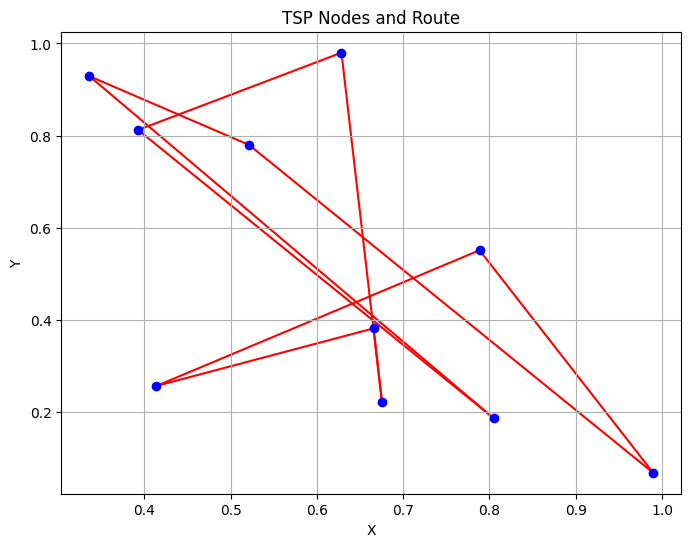

4.328872487793145


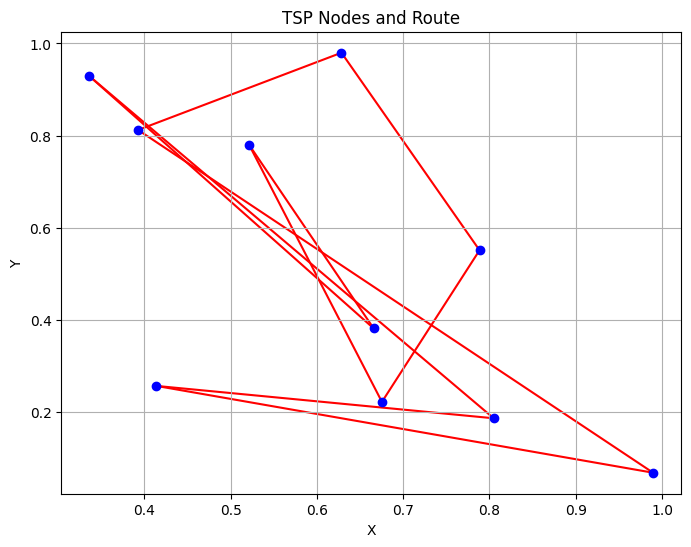

4.932616087344785


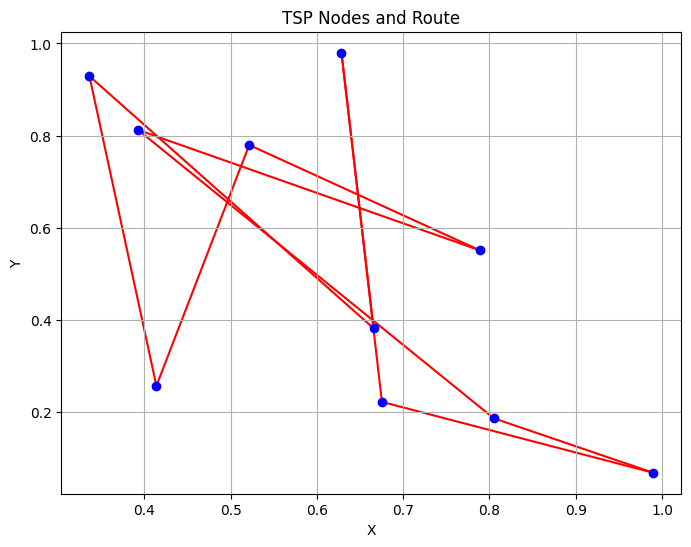

In [7]:
import random
import numpy as np

# Create initial population
def create_initial_population(pop_size, num_cities):
    population = []
    for _ in range(pop_size):
        #individual = list(np.random.permutation(num_cities)) # create a random solution
        individual = list(range(num_cities))
        random.shuffle(individual)
        population.append(individual)
    return population

def fitness(solution): # depende del problema
  distance = 0
  for i in range(len(solution)-1):
    distance += distances[solution[i]][solution[i+1]]
  return distance

population = create_initial_population(pop_size, N)
print(population, "\n\n")
plot_tsp(cities, population[0])
print(fitness(population[0]))
plot_tsp(cities, population[2])
print(fitness(population[2]))
plot_tsp(cities, population[4])

# Selection

Roulette Wheel Selection

In [9]:




# Selection: Roulette Wheel Selection for maximization
def roulete_wheel_selection(population, all_fitness):
    total_fitness = sum(all_fitness)
    selection_probs = [f / total_fitness for f in all_fitness]  # it works for maximization
    return population[np.random.choice(len(population), p=selection_probs)]


all_fitness = [ fitness(sol) for sol in population]
 # obtiene el fitness para cada inviduo
print("Population size:", len(population))
print("Num. cities:", N)
print(population)
print(all_fitness, "\n")

print("SELECTED IN MAXIMIZATION")
selected =  roulete_wheel_selection(population, all_fitness)
print("selected:", selected, fitness(selected), "\n")



def roulete_wheel_selection_minimization(population, all_fitness):
    max_fitness = max(all_fitness)
    inverted_fitness = [max_fitness - f for f in all_fitness]  # invert fitness
    total_fitness = sum(inverted_fitness)
    selection_probs = [f / total_fitness for f in inverted_fitness]
    return population[np.random.choice(len(population), p=selection_probs)]

print("SELECTED IN MINIMIZATION")
selected =  roulete_wheel_selection_minimization(population, all_fitness)
print("selected:", selected, fitness(selected), "\n")




Population size: 8
Num. cities: 10
[[8, 3, 6, 1, 2, 7, 5, 0, 9, 4], [0, 5, 9, 3, 2, 4, 1, 6, 7, 8], [7, 3, 5, 1, 0, 9, 6, 2, 4, 8], [5, 1, 7, 2, 9, 3, 0, 6, 8, 4], [6, 5, 0, 7, 8, 2, 3, 1, 9, 4], [9, 8, 0, 2, 3, 6, 5, 7, 4, 1], [8, 1, 0, 5, 6, 4, 2, 9, 7, 3], [7, 9, 8, 0, 2, 5, 3, 6, 4, 1]]
[np.float64(4.328872487793145), np.float64(4.456553334055582), np.float64(4.932616087344785), np.float64(4.6946462433909595), np.float64(5.134332018943392), np.float64(3.6813361584002102), np.float64(4.262831353664364), np.float64(3.9694084185799543)] 

SELECTED IN MAXIMIZATION
selected: [6, 5, 0, 7, 8, 2, 3, 1, 9, 4] 5.134332018943392 

SELECTED IN MINIMIZATION
selected: [8, 3, 6, 1, 2, 7, 5, 0, 9, 4] 4.328872487793145 



#Crossover

Single point crossover

In [6]:
def single_point_crossover(parent1, parent2):
    """
    Parameters:
    parent1 (list): The first parent.
    parent2 (list): The second parent.

    Returns:
    offspring1, offspring2: Two offspring produced by the crossover.
    """
    # Choose a crossover point
    crossover_point = random.randint(1, len(parent1) - 1)

    # Create offspring by combining parts of the parents
    offspring1 = parent1[:crossover_point] + parent2[crossover_point:]
    offspring2 = parent2[:crossover_point] + parent1[crossover_point:]

    return offspring1, offspring2

offspring1, offspring2 = single_point_crossover(population[0], population[1])
print("Parents:", list(population[0]), list(population[1]))
print("Offspring:", offspring1, offspring2)

Parents: [np.int64(1), np.int64(6), np.int64(4), np.int64(8), np.int64(2), np.int64(0), np.int64(5), np.int64(9), np.int64(7), np.int64(3)] [np.int64(1), np.int64(4), np.int64(8), np.int64(0), np.int64(6), np.int64(9), np.int64(7), np.int64(5), np.int64(3), np.int64(2)]
Offspring: [np.int64(1), np.int64(4), np.int64(8), np.int64(0), np.int64(6), np.int64(9), np.int64(7), np.int64(5), np.int64(3), np.int64(2)] [np.int64(1), np.int64(6), np.int64(4), np.int64(8), np.int64(2), np.int64(0), np.int64(5), np.int64(9), np.int64(7), np.int64(3)]


Ordered crossover

In [ ]:
def fill_child(child, parent, end):
    size = len(parent)
    current_pos = (end + 1) % size
    for gene in parent:
        if gene not in child:
            child[current_pos] = gene
            current_pos = (current_pos + 1) % size

def ordered_crossover(parent1, parent2):
    size = len(parent1)
    child1, child2 = [-1]*size, [-1]*size # crea los hijos llenos de -1 al principio

    start, end = sorted(random.sample(range(size), 2))
    child1[start:end+1] = parent2[start:end+1]
    child2[start:end+1] = parent1[start:end+1]

    fill_child(child1, parent1, end)
    fill_child(child2, parent2, end)

    return child1, child2

offspring1, offspring2 = ordered_crossover(population[0], population[1])
print("Parents:", population[0], population[1])
print("Offspring:", offspring1, offspring2)

Parents: [np.int64(4), np.int64(3), np.int64(0), np.int64(2), np.int64(1)] [np.int64(0), np.int64(2), np.int64(1), np.int64(4), np.int64(3)]
Offspring: [np.int64(0), np.int64(2), np.int64(1), np.int64(4), np.int64(3)] [np.int64(4), np.int64(3), np.int64(0), np.int64(2), np.int64(1)]


# Mutation

Swap mutation

In [ ]:
def swap_mutate(individual):
  i, j = np.random.choice(len(individual), 2, replace=False) # two random indices
  new_individual = individual.copy()
  new_individual[i], new_individual[j] = individual[j], individual[i]
  return new_individual

mutated = swap_mutate(population[0])
print("Original: \t", population[0])
print("Mutated: \t", mutated)

Original: 	 [np.int64(4), np.int64(3), np.int64(0), np.int64(2), np.int64(1)]
Mutated: 	 [np.int64(4), np.int64(0), np.int64(3), np.int64(2), np.int64(1)]


#Selection elite

We will select some of the previous generation

In [ ]:
def select_elite(population, all_fitness, elite_size):   # selecciona los que tengan el menor fitness
  elite_indices = np.argsort(all_fitness)[:elite_size]
  return np.array(population)[elite_indices], elite_indices


all_fitness = [ fitness(sol) for sol in population]
selected_elite, indices = select_elite(population, all_fitness, 2)

print("Population:", population)
print("Fitness:", all_fitness)
print("Selected Elite:", selected_elite)
print("Selected indices:", indices)

# para imprimir con mejor vista
import pandas as pd
data = {'Population': population, 'Fitness': all_fitness}
df = pd.DataFrame(data)
print(df)

Population: [[np.int64(4), np.int64(3), np.int64(0), np.int64(2), np.int64(1)], [np.int64(0), np.int64(2), np.int64(1), np.int64(4), np.int64(3)], [np.int64(0), np.int64(2), np.int64(1), np.int64(3), np.int64(4)], [np.int64(3), np.int64(4), np.int64(0), np.int64(1), np.int64(2)], [np.int64(3), np.int64(0), np.int64(4), np.int64(1), np.int64(2)], [np.int64(4), np.int64(3), np.int64(2), np.int64(1), np.int64(0)], [np.int64(3), np.int64(4), np.int64(1), np.int64(0), np.int64(2)], [np.int64(1), np.int64(2), np.int64(0), np.int64(4), np.int64(3)]]
Fitness: [np.float64(3.2768319214544888), np.float64(2.6431071257667678), np.float64(3.0272818414254083), np.float64(2.135316072615733), np.float64(2.412270019074694), np.float64(2.168814674141749), np.float64(2.19281699447368), np.float64(2.9553352201512015)]
Selected Elite: [[3 4 0 1 2]
 [4 3 2 1 0]]
Selected indices: [3 5]
        Population   Fitness
0  [4, 3, 0, 2, 1]  3.276832
1  [0, 2, 1, 4, 3]  2.643107
2  [0, 2, 1, 3, 4]  3.027282
3  [3, 

#Integration

Generation 0 | Best distance: 20.26590978152639
Generation 50 | Best distance: 13.497894626480216
Generation 100 | Best distance: 11.73987215496222
Generation 150 | Best distance: 9.81424602671655
Generation 200 | Best distance: 9.079537370596569
Generation 250 | Best distance: 8.859702448113877
Generation 300 | Best distance: 8.757478759988503
Generation 350 | Best distance: 8.586465171222896
Generation 400 | Best distance: 8.34441499930117
Generation 450 | Best distance: 8.100015857909321
Generation 500 | Best distance: 7.97295061425489
Generation 550 | Best distance: 7.97295061425489
Generation 600 | Best distance: 7.946773469677566
Generation 650 | Best distance: 7.769352718924614
Generation 700 | Best distance: 7.543531137449738
Generation 750 | Best distance: 7.507393599702539
Generation 800 | Best distance: 7.507393599702539
Generation 850 | Best distance: 7.507393599702539
Generation 900 | Best distance: 7.507393599702539
Generation 950 | Best distance: 7.468792451781278
Genera

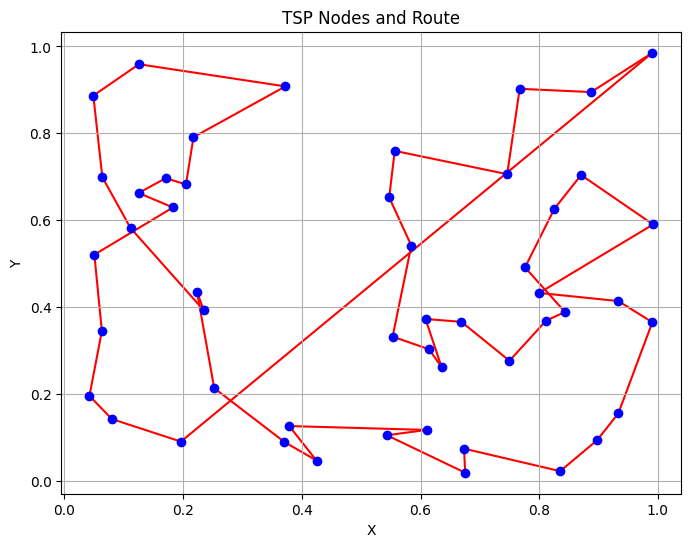

In [ ]:
history = []

# Genetic Algorithm
def genetic_algorithm(distance_matrix, mutation_rate, generations):
    num_cities = distance_matrix.shape[0]
    population = create_initial_population(pop_size, N) # population size and num cities
    all_fitness = [ fitness(sol) for sol in population]

    for generation in range(generations):
        new_population = []

        # Preserve elite individuals
        selected_elite, elite_indices = select_elite(population, all_fitness, elite_size)
        new_population.extend(selected_elite)

        # Create new population through crossover and mutation
        while len(new_population) < pop_size:
            parent1 = roulete_wheel_selection_minimization(population, all_fitness)
            parent2 = roulete_wheel_selection_minimization(population, all_fitness)
            child1, child2 = ordered_crossover(parent1, parent2)

            if random.random() < mutation_rate:
                child1 = swap_mutate(child1)
            if random.random() < mutation_rate:
                child2 = swap_mutate(child2)

            new_population.extend([child1, child2])

        population = new_population[:pop_size] # replace with new population
        all_fitness = [ fitness(sol) for sol in population]
        if generation % 50 == 0:
          print(f"Generation {generation} | Best distance: {min(all_fitness)}")
          history.append([generation, min(all_fitness)])


    best_route_index = np.argmin(all_fitness)
    best_route = population[best_route_index]
    best_distance = all_fitness[best_route_index]

    print(f"Final best distance: {best_distance}")
    return best_route, best_distance

# hyperparametros
pop_size = 100
N = 50
elite_size = 10
mutation_rate = 0.01
generations = 5000

#pop_size = 200
#N = 100
#elite_size = 50
#mutation_rate = 0.001
#generations = 10000

cities = np.random.rand(N, 2)
distances = squareform(pdist(cities, 'euclidean'))

best_route, best_distance = genetic_algorithm(distances, mutation_rate, generations)
plot_tsp(cities, best_route)

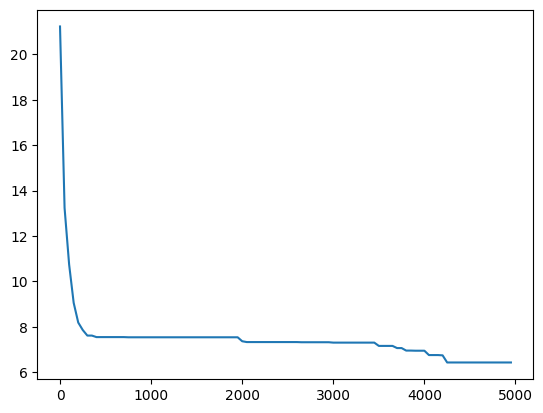

In [ ]:
from matplotlib import pyplot as plt

data = np.array(history)
x = data[:, 0]
y = data[:, 1]

plt.plot(x, y)


# GA vs Hill Climbing vs Simulated Annealing

In [ ]:
def get_neighbors(sol):
  neighbors = []
  for i in range(len(sol) - 1):
    for j in range(i + 1, len(sol)):
      new_sol = sol.copy()
      new_sol[i], new_sol[j] = new_sol[j], new_sol[i]
      neighbors.append(new_sol)

  return neighbors

def hill_climbing(sol):
  while True:
    #print("iteration:", sol)
    neighbors = get_neighbors(sol)
    best_neighbor = min(neighbors, key=fitness)

    if fitness(best_neighbor) < fitness(sol):
      sol = best_neighbor
    else:
      return sol

def random_neighbor(sol):
  i, j = np.random.choice(len(sol), 2, replace=False) # two random indices
  new_sol = sol.copy()
  new_sol[i], new_sol[j] = new_sol[j], new_sol[i]
  return new_sol

def accept(delta, T):
  if delta < 0:
    return True
  else:
    r = np.random.rand() # random value between [0, 1]
    if r < np.exp(-delta/T):
      return True
    else:
      return False

def simulated_annealing(T_max, T_min, cooling_rate):
  T = T_max
  x = initial_solution.copy()
  E = fitness(x)

  print("temperatura:", T)
  print("x", x)
  print("E", E, "\n")


  while (T > T_min) :
    x_new = random_neighbor(x)
    E_new = fitness(x_new)
    delta = E_new - E
    #print("iteration, T:", T, " delta:", delta)
    if accept(delta, T):
      x = x_new
      E = E_new

    T = T*cooling_rate

  return x

temperatura: 1000
x [46 32 37 40  0  3 16 21 28 44 31 43 17  7 45  1 27 15  5 29 47 39  4  8
 26 25  2 38 41  9 36 20 42 35 13 10 18  6 23 11 22 12 14 49 30 34 24 19
 33 48]
E 26.955566132272917 

Hill Climbing distance 7.263031110970141
Simulated Annealing distance 6.780073553611781


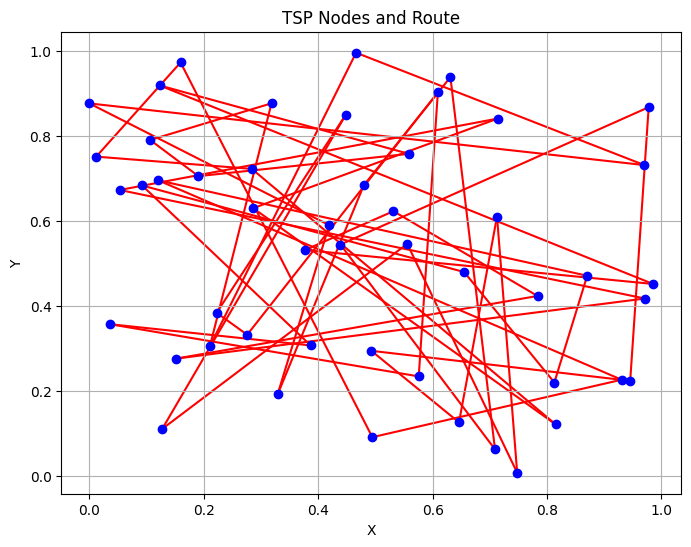

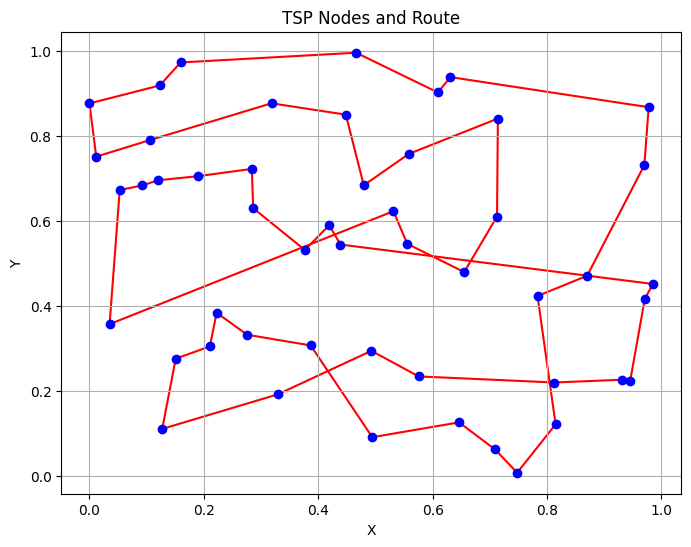

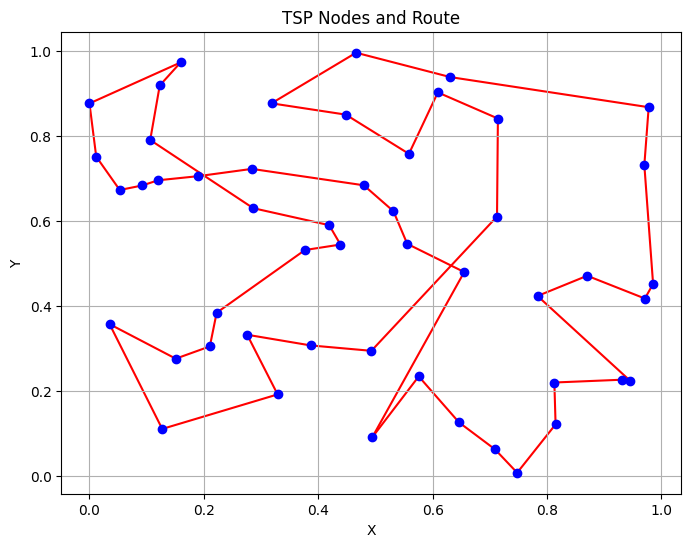

In [ ]:
T_max = 1000
T_min = 0.000001
cooling_rate = 0.9999

# initial solution
initial_solution = np.array(list(range(N)))
np.random.shuffle(initial_solution)

sol1 = hill_climbing(initial_solution)
sol2 = simulated_annealing(T_max, T_min, cooling_rate)

print("Hill Climbing distance", fitness(sol1))
print("Simulated Annealing distance", fitness(sol2))

plot_tsp(cities, initial_solution)
plot_tsp(cities, sol1)
plot_tsp(cities, sol2)